<a href="https://colab.research.google.com/github/ishitarajan/Python-/blob/main/C_123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:

len(X_train)

60000

In [4]:

len(X_test)

10000

In [5]:
X_train[0].shape 

(28, 28)

In [6]:

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

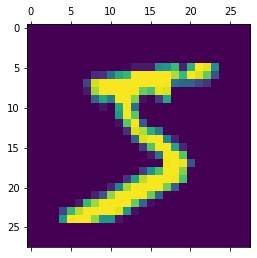

In [7]:

plt.matshow(X_train[0])

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

In [11]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4632 - accuracy: 0.8795
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9219
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9256


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2654 - accuracy: 0.9263


[0.26539817452430725, 0.9262999892234802]

In [15]:
y_predicted = model.predict(X_test_flattened)


In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    4,    0,    5,    8,    2,    3,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,    9,  928,   17,    9,    3,   13,    9,   38,    3],
       [   0,    0,   20,  930,    1,   19,    2,    8,   21,    9],
       [   1,    1,    6,    1,  922,    0,   10,    2,   10,   29],
       [   7,    3,    2,   41,   12,  771,   16,    6,   29,    5],
       [   7,    3,    7,    1,    7,   10,  919,    2,    2,    0],
       [   1,    6,   23,    8,   10,    0,    0,  942,    1,   37],
       [   4,    9,    8,   27,    9,   30,    8,    9,  863,    7],
       [   8,    7,    2,   11,   30,    9,    0,   19,    7,  916]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

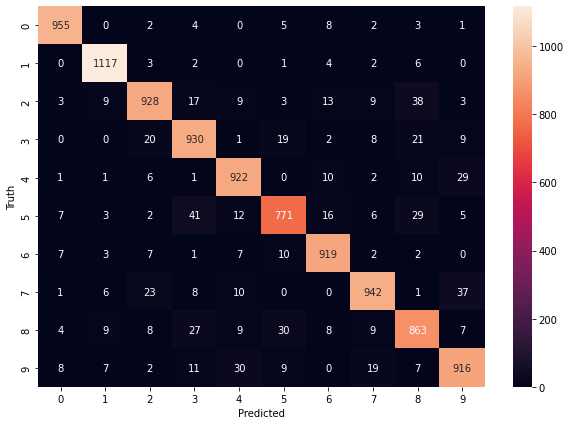

In [20]:
import seaborn as sns 

plt.figure(figsize = (10,7)) 
sns.heatmap(cm, annot=True, fmt='d') 
plt.xlabel('Predicted') 
plt.ylabel('Truth')

In [21]:

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2728 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1276 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0886 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0676 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0530 - accuracy: 0.9836


Text(69.0, 0.5, 'Truth')

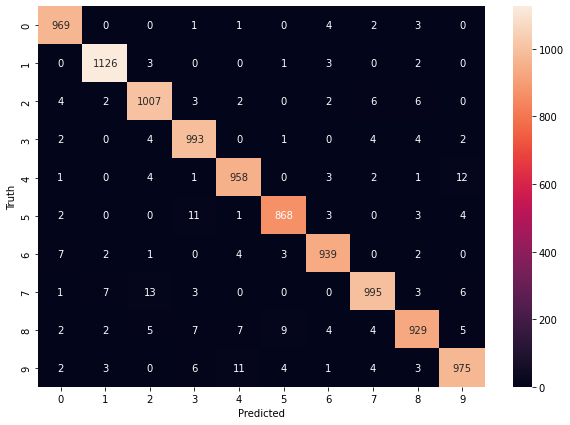

In [22]:
y_predicted = model.predict(X_test_flattened) 
y_predicted_labels = [np.argmax(i) for i in y_predicted] 
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels) 
plt.figure(figsize = (10,7)) 
sns.heatmap(cm, annot=True, fmt='d') 
plt.xlabel('Predicted') 
plt.ylabel('Truth')